#  <font color=blue> ****Predicting Customer Behavior using machine learning algorithms**** </font>

## Introduction


Customer behavior analysis is crucial for businesses to better understand their customers' needs, preferences, and buying patterns. This understanding enables marketing teams to tailor their strategies more effectively, ensuring efficient outreach, increased customer satisfaction, and enhanced marketing strategies. Machine learning and predictive analysis are essential tools for uncovering insights from vast amounts of data, helping businesses identify customer needs and behavior trends. With the growing availability of customer data from sources like online transactions, social media, and customer service interactions, traditional analysis methods are becoming insufficient. As businesses struggle to extract meaningful insights, they face missed opportunities and inefficiencies in targeting and customer engagement efforts.

## Challenges

With the overwhelming volume of customer data, businesses face challenges in effectively harnessing this information to drive strategies. Traditional analysis methods fall short when it comes to analyzing the vast datasets now available. The main challenges include:

Extracting meaningful insights from large datasets to uncover key behavioral patterns and trends.
Missed opportunities due to the inability to fully leverage data for targeted marketing and customer engagement.
Inefficiencies in resource allocation because of limited insight into customer segmentation and responsiveness.

## Objective 

 An automobile company has plans to enter new markets with their existing products and after intensive market research, they’ve realized that the behavior of the new market is like their existing market. In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has worked exceptionally well for them. Accordingly, they plan to use the same strategy for the new markets.The objective of the project is to predict the appropriate customer segments(A,B,C,D ) in a new market based on the existing market behavior by leveraging  machine learning techniques thus hepls:

 -	Personalized marketing:   help the sales team to create highly targeted marketing campaigns focused on the interest and behaviors of specific customer groups, leading to a more satisfying customer experience
 
 -	Efficient resource allocation:  business can focus their marketing, sales, and product development effort on segments that respond positively which maximize revenue
 
 -	Increase customer retention:  by meeting the specific needs of each segment business can build relationships with customers, increasing loyalty and reducing churn 

## Dataset and Data fields :


The dataset includes information on customers in the existing market , with fields age, gender , martial status, education , profession , work experience , family size, spending score and de-idenified categories. 

## Import Necessary libraries

In [131]:
import pandas as pd # data processing , csv file(e.g. pd.read_s-csv)
import numpy as np  # linear algebra
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go  # data visualization
from plotly import tools
from plotly.subplots import make_subplots
from  sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing  import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from  sklearn.feature_selection import mutual_info_classif
import ipywidgets as widgets
import streamlit as st


plt.figure(figsize=(15,8))
sns.set(rc={'figure.figsize':(12,6)})


<Figure size 1500x800 with 0 Axes>

## Loading and Preprocessing the data

In [132]:
train = pd.read_csv("https://raw.githubusercontent.com/AbaditEstif/machine_learning/main/Train.csv")
test= pd.read_csv("https://raw.githubusercontent.com/AbaditEstif/machine_learning/main/Test.csv")

In [133]:
train.shape

(8068, 11)

In [134]:
train.duplicated().sum()

0

In [135]:
test.shape

(2627, 11)

In [136]:
test.duplicated().sum()

0

In [137]:
# Concatenate both train and test datasets


data = pd.concat([train,test])

### Data understanding 

My aim is to observe and study the categorical and numerical features of the dataset. by examining the unique value counts. I can understand the distribution and quality of the data and can get insights about the quality of the data,potential issues such as duplicates , imbalances and missing values.

In [138]:
print("Number of rows:", len(data))
data.head(10)

Number of rows: 10695


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [140]:
data.shape

(10695, 11)

In [141]:
# les rename Var_1 column for better understanding 

data= data.rename(columns={"Var_1":"Category"})

In [142]:
# Checking for misspelled or unsual values in columns


print("Gender:", data['Gender'].unique())
print("Ever_Maried:", data['Ever_Married'].unique())
print("Graduated:", data['Graduated'].unique())
print("Spending_Score:", data['Spending_Score'].unique())
print("Profession:", data['Profession'].unique())
print("Segmentation:", data['Segmentation'].unique())
print("Category:", data['Category'].unique())




Gender: ['Male' 'Female']
Ever_Maried: ['No' 'Yes' nan]
Graduated: ['No' 'Yes' nan]
Spending_Score: ['Low' 'Average' 'High']
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Segmentation: ['D' 'A' 'B' 'C']
Category: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


### Statistical Analysis

we will use data.describe(), which will give a descriptive overview of the dataset

In [143]:
 # describe Numerical features
    
num_data= data.describe()
num_data.style.background_gradient(cmap='Oranges')



,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


The above table shows the count,mean standard deviation,min,25%,50%,75% and max values for each column and we can observe that:
- customer age ranges from 18 to  89 years old with mean of 43.5
- works experience ranges from 0 to 14 year with mean of 2.64
- family size ranges from 1 to 9 with  mean of 2.84


In [144]:
data.duplicated().sum()

38

In [145]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category',
       'Segmentation'],
      dtype='object')

In [146]:
data['Age'].value_counts( dropna= False)

35    321
42    320
37    304
43    301
40    300
     ... 
75     37
78     36
76     36
80     33
85     32
Name: Age, Length: 67, dtype: int64

In [147]:
data['Age'].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88],
      dtype=int64)

In [148]:
print("Gender:", data['Gender'].value_counts( dropna= False)),'\n',

print("Graduated:", data['Graduated'].value_counts( dropna= False)),'\n',

print("Spending_Score:", data['Spending_Score'].value_counts( dropna= False))


Gender: Male      5841
Female    4854
Name: Gender, dtype: int64
Graduated: Yes    6570
No     4023
NaN     102
Name: Graduated, dtype: int64
Spending_Score: Low        6494
Average    2599
High       1602
Name: Spending_Score, dtype: int64


In [149]:
data['Profession'].value_counts(dropna=False)

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
NaN               162
Name: Profession, dtype: int64

In [150]:
data['Work_Experience'].value_counts(dropna= False)

1.0     3127
0.0     3087
NaN     1098
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
10.0      64
11.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [151]:
data['Family_Size'].value_counts(dropna= False)

2.0    3158
1.0    1965
3.0    1952
4.0    1823
5.0     812
NaN     448
6.0     290
7.0     122
8.0      65
9.0      60
Name: Family_Size, dtype: int64

### Checking and Handling missing values

In [152]:
# checking missing values

data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Category            108
Segmentation          0
dtype: int64

 ### Handling missing values

I will use imputing mechanism to fill the missing value and use mode for categorical columns and median for numerical columns.


In [153]:
# Replacing missing values in categorical columns with mode and Numerical columns with median

data['Family_Size'].fillna(data['Family_Size'].median(),inplace=True)
data['Work_Experience'].fillna(data['Work_Experience'].median(),inplace=True)

data['Graduated'].fillna(data['Graduated'].mode()[0],inplace=True)
data['Ever_Married'].fillna(data['Ever_Married'].mode()[0],inplace=True)
data['Profession'].fillna(data['Profession'].mode()[0],inplace=True)
data['Category'].fillna(data['Category'].mode()[0],inplace=True)


In [154]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

In [155]:
data.shape

(10695, 11)

###  Checking and handling outliers

Outliers can be detected using visualizations, implementing mathematical formulas on the dataset or using statistical 
approach.

### Visualizing and removing outliers using Box plot

It captures the summary of the data with a simple box and whiskers and summarizes using 25th ,50th and 75th percentiles.
And it can help us to get insights (quartiles, median and outliers ) of the data , potential outliers and understand the
centeral tendency,

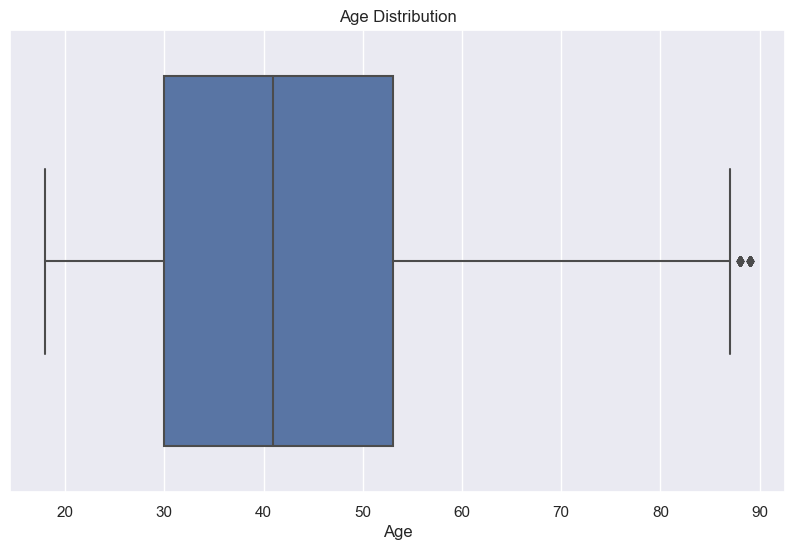

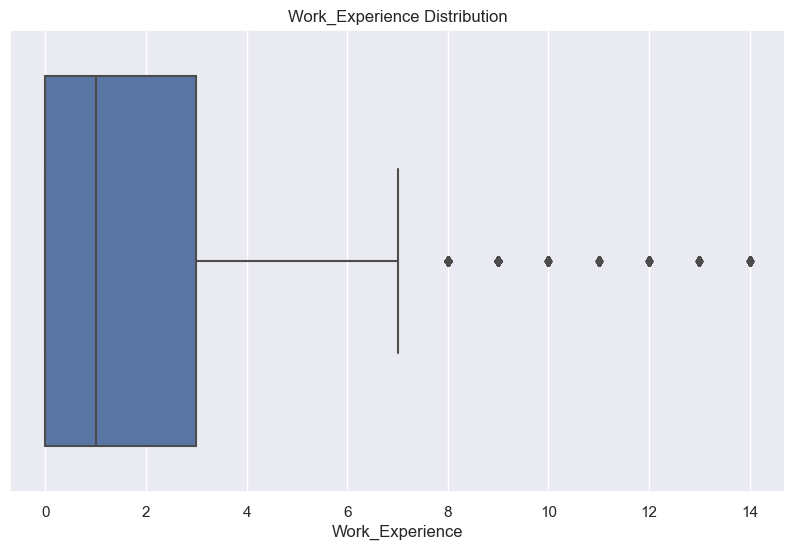

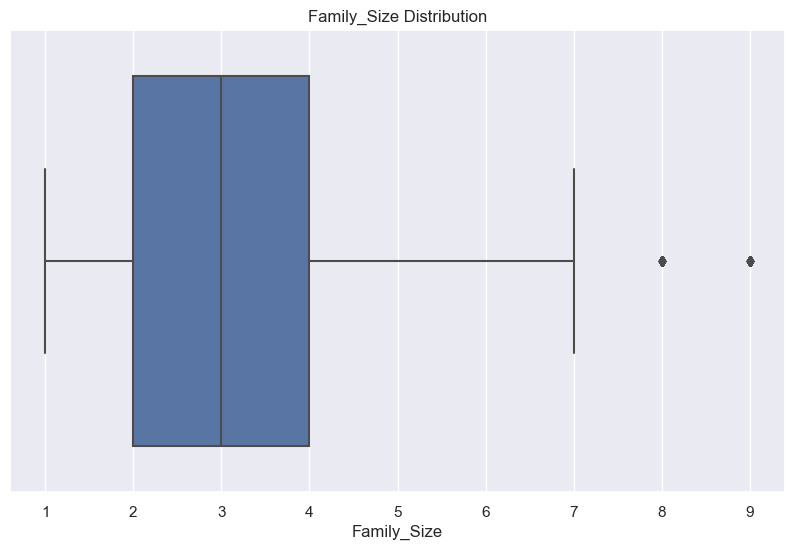

In [156]:
# Checking outlier for the numerical features

numerical_cols=['Age','Work_Experience','Family_Size']

for column in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data[column])
    plt.title(f'{column} Distribution')
    plt.show()




From the above graph we can observe that work_experience values above 10 are acting as outliers. To address those outliers I will apply IQR(Inter Quartile Range). IQR is the most commonly used and most trusted approach used in the resarch field.
- IQR= Quartile3-Quartile1, this formula  will provide a measure of the spread of the middle 50% of the data in the work_experience columns .
 
 - I am calculating the interquartile rage(IQR) for work experience column,
 - first computes the first quartile (Q1) and third quartile(Q3) using the midpoint method, then calcualte thr IQR as the difference between Q3 and Q1, providing the middle 50% of work experience.

In [157]:
Q1 = np.percentile(data['Work_Experience'], 25 , method ='midpoint')

Q3= np.percentile(data['Work_Experience'], 75, method ='midpoint')

IQR= Q3-Q1

print(IQR)

3.0


In [158]:
# let define the upper and lower bound (1.5*IQR)

# Above Uper bound

upper =Q3+1.5*IQR

upper_array =np.array(data['Work_Experience']>= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below lower bound

lower= Q1-1.5*IQR
lower_array = np.array(data['Work_Experience']<= lower)
print("Lower Bound:", lower)
print(lower_array.sum())
 
    

Upper Bound: 7.5
1536
Lower Bound: -4.5
0


In [159]:
# let remove the outlier from work experience column

data['Work_Experience']= data['Work_Experience'].apply(lambda x: lower if x<lower else(upper if x>upper else x))


In [160]:
print(data['Work_Experience'].describe())

count    10695.000000
mean         2.208322
std          2.689670
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          7.500000
Name: Work_Experience, dtype: float64


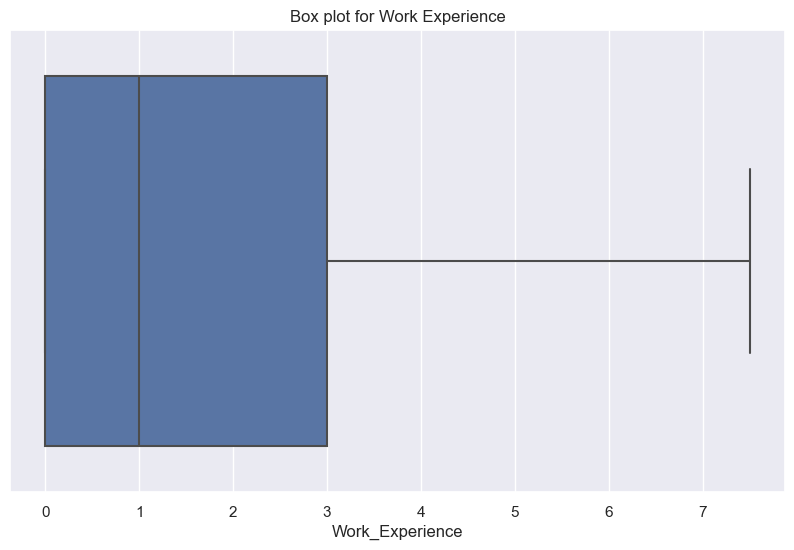

In [161]:
# let examine the modified work experience after removal of the outliers

plt.figure(figsize=(10,6))
sns.boxplot(x= data['Work_Experience'])
plt.title('Box plot for Work Experience')
plt.show()